In [286]:
import pandas as pd
import numpy as np
from sklearn import (tree,
                     metrics,
                     preprocessing)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from plot_for_dic_free import plot_probabilities_2d

In [287]:
warnings.filterwarnings('ignore')
%matplotlib inline

In [288]:
diabetes_data = pd.read_csv('data/diabetes_cleaned.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,35.7,0.148,21,0
2,2,108.0,64.0,29.0,30.8,0.158,21,0
3,8,107.0,80.0,29.0,24.6,0.856,34,0
4,7,136.0,90.0,29.0,29.9,0.210,50,0


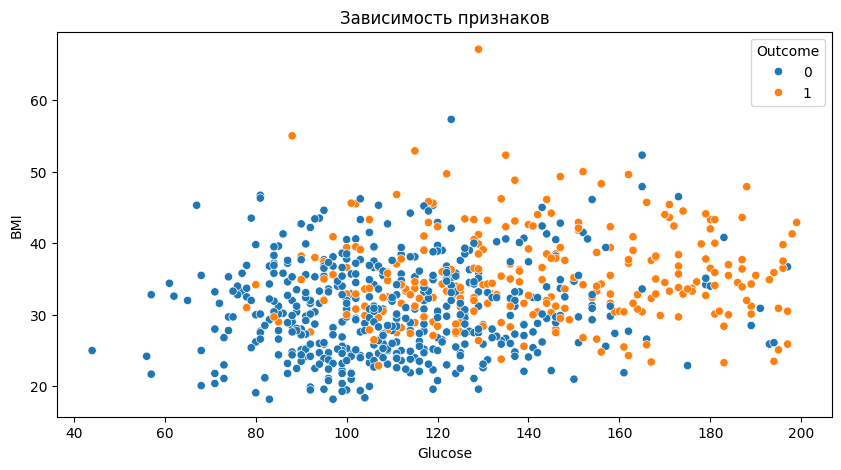

In [289]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(
    diabetes_data,
    x='Glucose',
    y='BMI',
    hue='Outcome',
)
ax.set_title('Зависимость признаков');

In [290]:
X = diabetes_data[['Glucose', 'BMI']]
y = diabetes_data['Outcome']

In [291]:
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    random_state=42
)
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

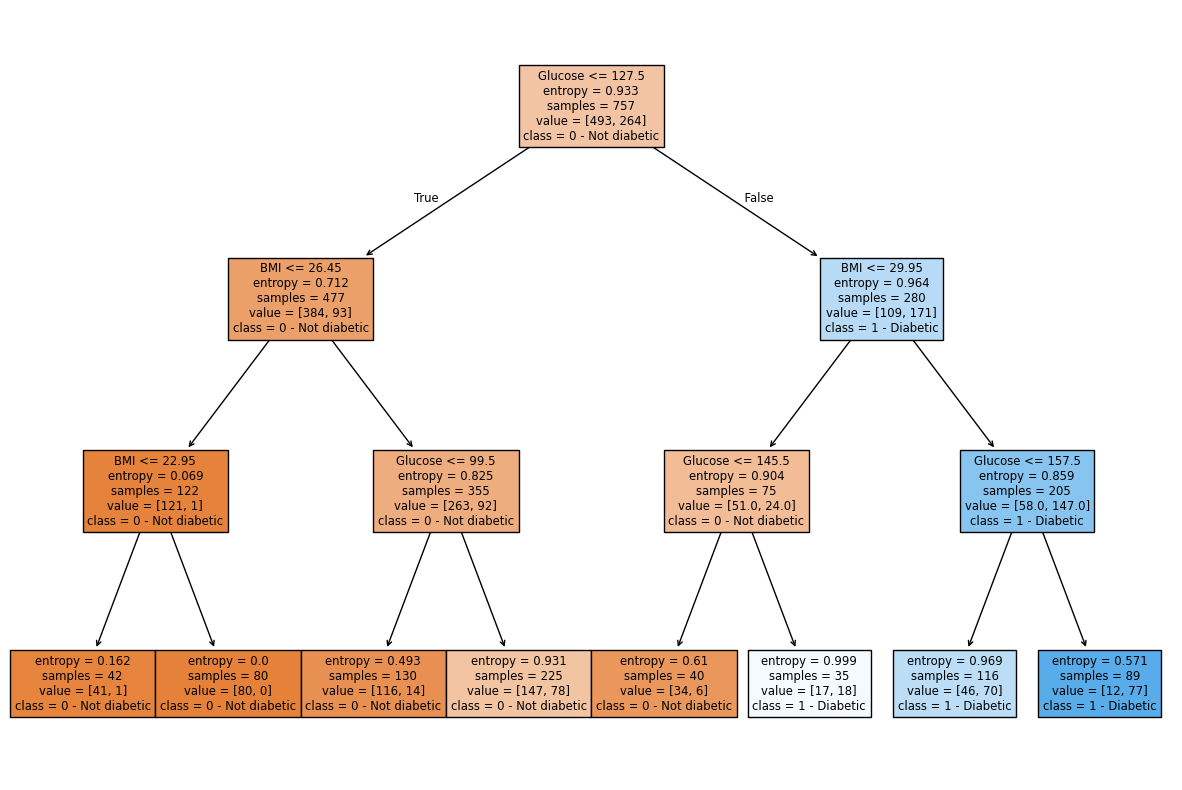

In [292]:
fig, ax = plt.subplots(figsize=(15, 10))
tree.plot_tree(
    dt_clf_2d,
    feature_names=X.columns,
    class_names=['0 - Not diabetic', '1 - Diabetic'],
    filled=True
);

In [293]:
x_new = [[180, 51]]
y_new_predict = dt_clf_2d.predict(x_new)
print('Predicted class: {}'.format(y_new_predict))

Predicted class: [1]


In [294]:
x_new = [[180, 51]]
y_new_proba_predict = dt_clf_2d.predict_proba(x_new)
print('Predicted probabilities: {}'.format(np.round(y_new_proba_predict, 3)))

Predicted probabilities: [[0.135 0.865]]


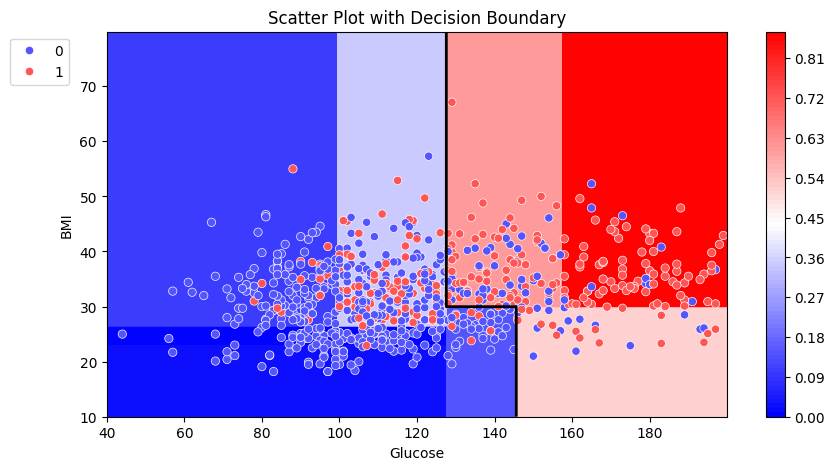

In [295]:
plot_probabilities_2d(X, y, dt_clf_2d)

In [296]:
print(metrics.classification_report(y, dt_clf_2d.predict(X)))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       493
           1       0.69      0.62      0.65       264

    accuracy                           0.77       757
   macro avg       0.75      0.74      0.74       757
weighted avg       0.77      0.77      0.77       757



In [297]:
dt_clf_bad = tree.DecisionTreeClassifier(
    criterion='entropy',
    random_state=42
)
dt_clf_bad.fit(X, y)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [298]:
print(metrics.classification_report(y, dt_clf_bad.predict(X)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       493
           1       1.00      0.97      0.98       264

    accuracy                           0.99       757
   macro avg       0.99      0.98      0.99       757
weighted avg       0.99      0.99      0.99       757



In [299]:
# fig, ax = plt.subplots(figsize=(15, 10))
# tree.plot_tree(
#     dt_clf_bad,
#     feature_names=X.columns,
#     class_names=['0 - Not diabetic', '1 - Diabetic'],
#     filled=True
# );

In [300]:
dt_clf_bad.get_depth()

22

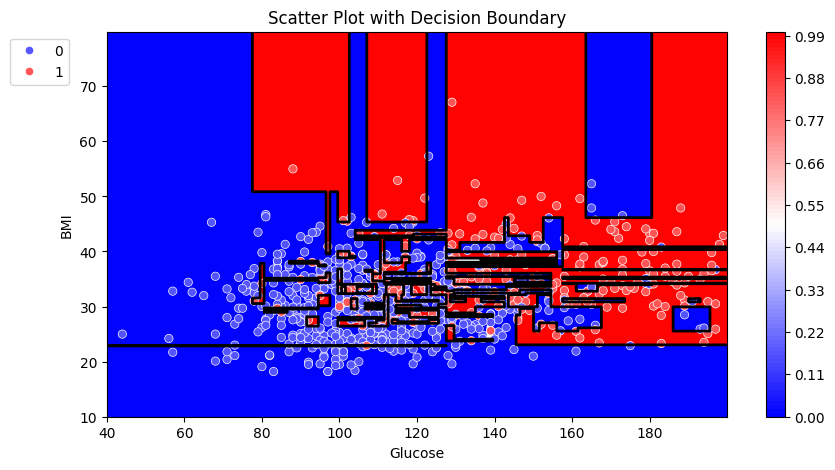

In [301]:
plot_probabilities_2d(X, y, dt_clf_bad)

In [302]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [303]:
dt_clf_full = tree.DecisionTreeClassifier(
    criterion='entropy',
    max_depth=6,
    random_state=42
)
dt_clf_full.fit(X, y)
y_pred = dt_clf_full.predict(X)
print(metrics.classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       493
           1       0.84      0.69      0.76       264

    accuracy                           0.85       757
   macro avg       0.84      0.81      0.82       757
weighted avg       0.84      0.85      0.84       757



In [304]:
print(dt_clf_full.feature_importances_)

[0.02675774 0.36675873 0.03368236 0.04553664 0.24588118 0.14137465
 0.14000868]


In [305]:
features = X.columns
feature_importances = pd.Series(dt_clf_full.feature_importances_, index=features).sort_values(ascending=False)
feature_importances

Glucose                     0.366759
BMI                         0.245881
DiabetesPedigreeFunction    0.141375
Age                         0.140009
SkinThickness               0.045537
BloodPressure               0.033682
Pregnancies                 0.026758
dtype: float64

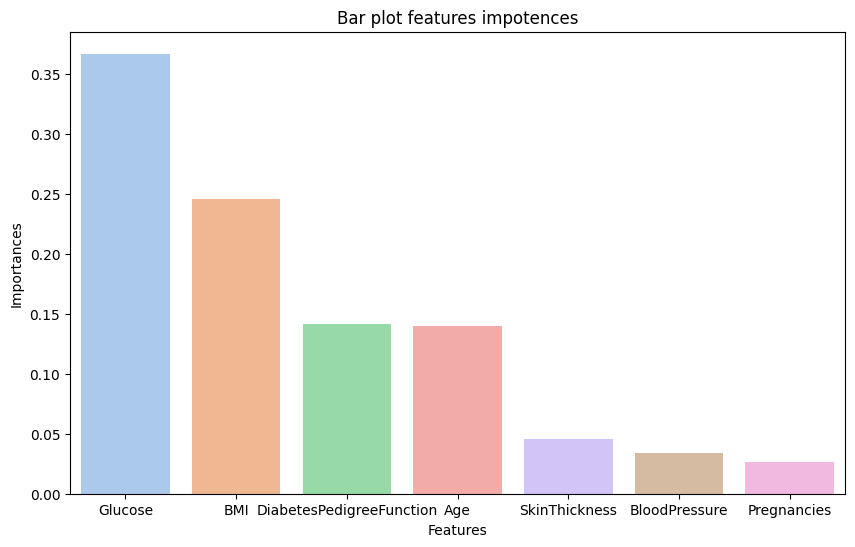

In [307]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(
    x=feature_importances.index,
    y=feature_importances.values,
    ax=ax,
    palette='pastel', 
)
ax.set_title('Bar plot features impotences')
ax.set_xlabel('Features')
ax.set_ylabel('Importances');